In [27]:
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

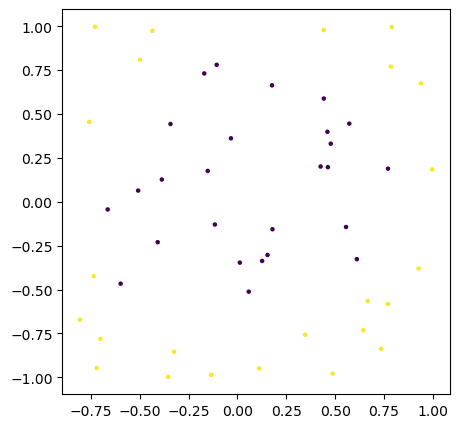

In [28]:
X = np.random.uniform(-1, 1, size=(50, 2)) 
y_lst = []
for x in X: 
    if np.linalg.norm(x) < 0.8: 
        y_lst.append(0.0) 
    else: 
        y_lst.append(1.0) 
Y = np.array(y_lst) 

plt.figure(figsize=(5, 5))
plt.scatter(*zip(*X), c=y_lst, s=5)
plt.savefig("untrans_data.png")

In [36]:
class RadialFeatures(BaseEstimator, TransformerMixin):
    
    def __init__(self, N):
        self.N = N
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X): 
        transformed_columns = []
        for x in X: 
            transformed_columns.append(np.linalg.norm(x) - 1) 
        
        return np.array(transformed_columns).reshape(-1, 1) 
    

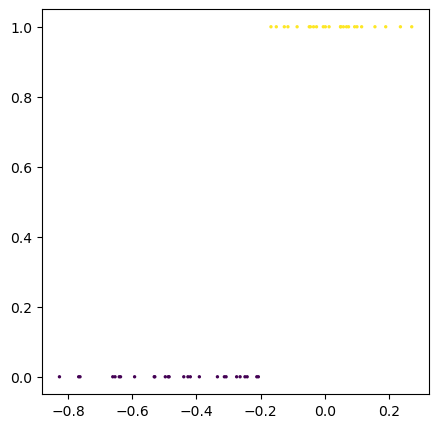

In [37]:
X_trans = RadialFeatures(10).fit_transform(X) 

plt.figure(figsize=(5, 5))
plt.scatter(X_trans, Y, c=Y, s=2)
# plt.savefig("trans_data.png")

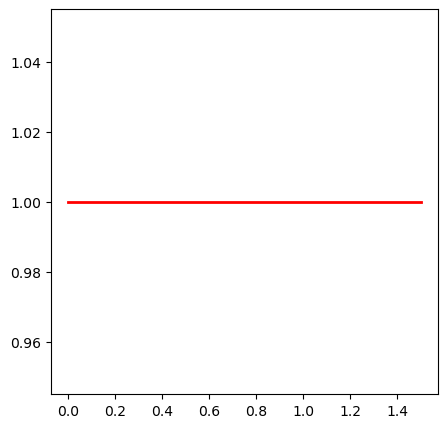

In [39]:
model = LogisticRegression().fit(X_trans, Y) 

rang = np.linspace(0, 1.5) 

plt.figure(figsize=(5, 5))
plt.plot(rang, model.predict(rang.reshape(-1, 1)).reshape(-1), c="r", linewidth=2)
# plt.savefig("trans_fit.png")

In [40]:
model = Pipeline([("gauss_transform", RadialFeatures(10)), 
                  ("lin_regression", LogisticRegression())
                  ]) 
model.fit(X, Y)



Pipeline(steps=[('gauss_transform', RadialFeatures(N=10)),
                ('lin_regression', LogisticRegression())])

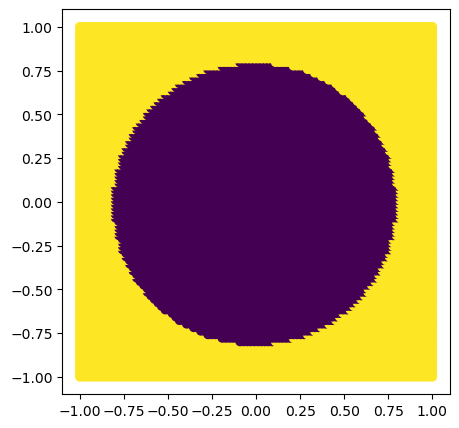

In [41]:
x_vals = np.linspace(-1, 1, 100)
y_vals = np.linspace(-1, 1, 100)
xx, yy = np.meshgrid(x_vals, y_vals)
coords = np.stack((xx.ravel(), yy.ravel()), axis=1)
plt.figure(figsize=(5, 5))
plt.scatter(xx, yy, c=model.predict(coords))
# plt.savefig("untrans_fit.png")